In [18]:
model_baseimport glob
import pandas as pd
data = pd.read_csv('../../../dataset/dataset_100/origin/data-7-train-origin.csv')
print(data.shape)
data.head(3)

(1361, 9)


,Unnamed: 0,fliename,iou,min,std,y,area,position,answers
0,0,1,0.000000,24,33.091864,386,23086,"[571, 386, 194, 119]",0
1,1,1,0.992541,69,42.117265,455,2279,"[1473, 455, 53, 43]",1
2,2,1,0.000000,31,16.803156,466,23680,"[191, 466, 185, 128]",0


In [30]:
test_data = pd.read_csv('../../../dataset/dataset_100/origin/data-7-test-origin.csv')
X_test = test_data[['iou', 'min', 'std', 'y', 'area']]
y_test = test_data['answers']
test_data.head(3)

,Unnamed: 0,fliename,iou,min,std,y,area,position,answers
0,0,1,1.00000,5,3.531798,494,775,"[1209, 494, 25, 31]",0
1,1,1,1.00000,0,75.234196,625,714,"[1663, 625, 34, 21]",0
2,2,1,0.26087,2,25.645762,358,1058,"[1298, 358, 23, 46]",0


In [47]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import ExtraTreesClassifier

def make_importances(X=None, y=None):
    feature_names = ['iou', 'min', 'std', 'y', 'area']
    
    # Build a forest and compute the impurity-based feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    
    f_name = []
    for i in indices:
        f_name.append(feature_names[i])
    # Print the feature ranking
    print("Feature ranking:")

    
    for f in range(X.shape[1]):
        print("%d. feature [%s] %d (%f)" % (f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), f_name)
    plt.xlim([-1, X.shape[1]])
    plt.show()

X_train: (1361, 5)
y_train: (1361,)
Feature ranking:
1. feature [min] 1 (0.256383)
2. feature [iou] 0 (0.243278)
3. feature [y] 3 (0.222334)
4. feature [area] 4 (0.147685)
5. feature [std] 2 (0.130320)


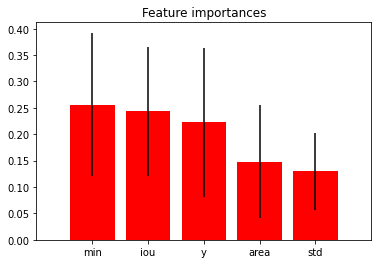

In [48]:
X_train = data[['iou', 'min', 'std', 'y', 'area']]
y_train = data['answers']
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
make_importances(X=X_train, y=y_train)

X_test: (3649, 5)
y_test: (3649,)
Feature ranking:
1. feature [area] 4 (0.282535)
2. feature [y] 3 (0.249372)
3. feature [iou] 0 (0.184210)
4. feature [std] 2 (0.162764)
5. feature [min] 1 (0.121119)


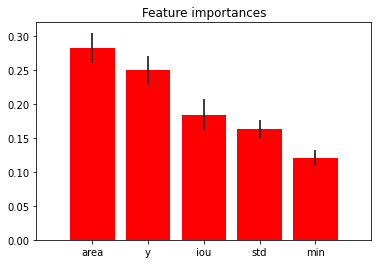

In [49]:
X_test = test_data[['iou', 'min', 'std', 'y', 'area']]
y_test = test_data['answers']
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
make_importances(X=X_test, y=y_test)

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-0-22-0-py

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
feature_names = ['iou', 'min', 'std', 'y', 'area']
def func_permutation_importance(X=None, y=None):
    rf = RandomForestClassifier(random_state=0).fit(X, y)
    result = permutation_importance(rf, X, y, n_repeats=10, random_state=0,
                                    n_jobs=-1)

    fig, ax = plt.subplots()
    print(result.importances_mean)
    sorted_idx = result.importances_mean.argsort()
    print(sorted_idx)
    f_name = []
    for i in sorted_idx:
        f_name.append(feature_names[i])
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=f_name)
    ax.set_title("Permutation Importance of each feature")
    ax.set_ylabel("Features")
    fig.tight_layout()
    plt.show()

[0.02182219 0.13365173 0.09250551 0.12292432 0.0578986 ]
[0 4 2 3 1]


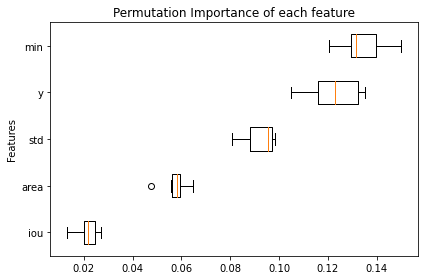

In [63]:
func_permutation_importance(X=X_train, y=y_train)

[0.15215127 0.08339271 0.13688682 0.31279803 0.29586188]
[1 2 0 4 3]


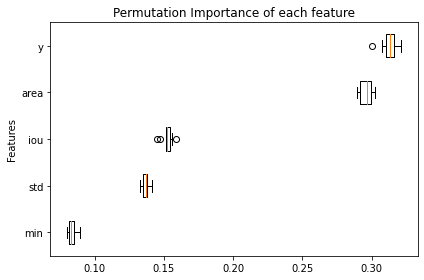

In [64]:
func_permutation_importance(X=X_test, y=y_test)

## ROC Model

In [ ]:
X_train_total = 

In [117]:
from joblib import dump, load
svc = load("../../../dataset/dataset_100/origin/data-7-train-origin-model-svm.pkl")
rfc = load("../../../dataset/dataset_100/origin/data-7-train-origin-model-rf.pkl")

In [127]:
print(svc)
print(rfc)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(C=1000000.0, gamma=0.01))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        n_estimators=50))])


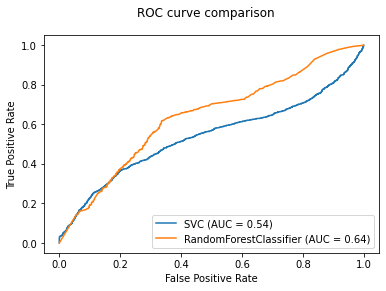

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt



svc_disp = plot_roc_curve(svc, X_test, y_test, name="SVC")
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_, name="RandomForestClassifier")
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()


In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [120]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    #畫圖
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/alanhc-school/miniconda3/envs/research/lib/python3.6/site-packages/matplotlib/pyplot.py'>

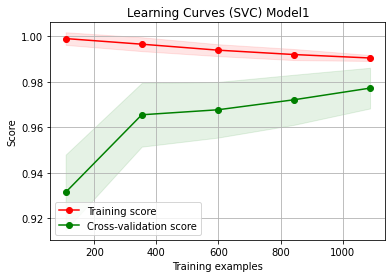

In [121]:
#學習曲線 Model1 GaussianNB
title = "Learning Curves (SVC) Model1"
# Cross validation with 100 iterations to get smoother mean test and train
#隨機抽樣切分0.2作為cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#建立估計模型
estimator = svc
#畫圖
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=-1)

<module 'matplotlib.pyplot' from '/home/alanhc-school/miniconda3/envs/research/lib/python3.6/site-packages/matplotlib/pyplot.py'>

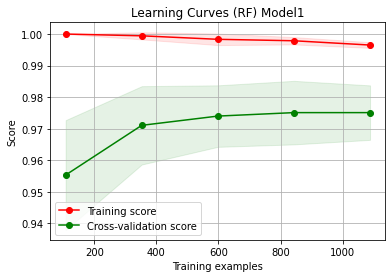

In [122]:
#學習曲線 Model1 GaussianNB
title = "Learning Curves (RF) Model1"
# Cross validation with 100 iterations to get smoother mean test and train
#隨機抽樣切分0.2作為cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#建立估計模型
estimator = rfc
#畫圖
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=-1)

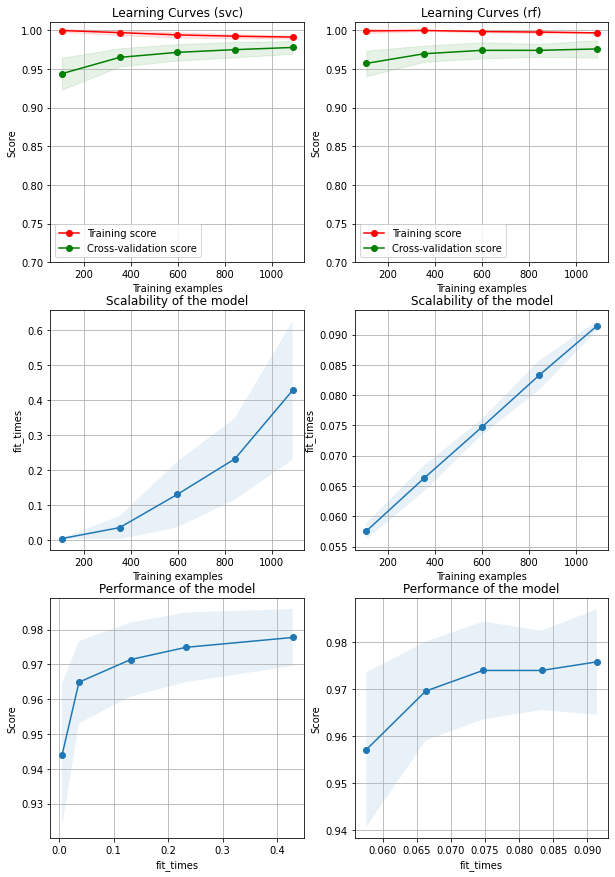

In [123]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))



title = "Learning Curves (svc)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = svc
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (rf)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = rfc
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [124]:

"""
hahaha
"""
print(__doc__)


hahaha



In [125]:
# check NaN
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN

,Unnamed: 0,fliename,iou,min,std,y,area,position,answers
